In [330]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [331]:
dataset = pd.read_csv("corona_tested_individuals.csv")
dataset.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [332]:
new_data = dataset.drop(['test_date'],axis=1)

In [333]:
new_data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,None,female,Other
1,1,0,0,0,0,negative,None,female,Other
2,0,1,0,0,0,negative,None,male,Other
3,1,0,0,0,0,negative,None,female,Other
4,1,0,0,0,0,negative,None,male,Other


In [334]:
new_data.dtypes

cough                  object
fever                  object
sore_throat            object
shortness_of_breath    object
head_ache              object
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [335]:
cols = ['cough', 'fever', 'sore_throat','shortness_of_breath','head_ache','corona_result','age_60_and_above','gender','test_indication']

In [336]:
new_data.shape

(278848, 9)

In [337]:
for col in cols:
    new_data[col] = new_data[col].astype('category')
    
new_data.drop(new_data[new_data.cough == 'None'].index, inplace=True)
new_data.drop(new_data[new_data.fever == 'None'].index, inplace=True)
new_data.drop(new_data[new_data.corona_result == 'other'].index, inplace=True)
new_data.drop(new_data[new_data.age_60_and_above == 'None'].index, inplace=True)
new_data.drop(new_data[new_data.gender == 'None'].index, inplace=True)


In [338]:
new_data.shape

(136294, 9)

In [339]:
new_data.dtypes

cough                  category
fever                  category
sore_throat            category
shortness_of_breath    category
head_ache              category
corona_result          category
age_60_and_above       category
gender                 category
test_indication        category
dtype: object

In [340]:
categorical_columns = {
                        "cough": {"0": 0, "1": 1},
                       "fever": {"0": 0, "1": 1},
                      "sore_throat": {"0": 0, "1": 1},
                         "shortness_of_breath": {"0": 0, "1": 1},
                        "head_ache": {"0": 0, "1": 1},
                       "corona_result": {"negative": 0, "positive": 1},
                "age_60_and_above": {"No": 0, "Yes": 1},
                "gender":{"female":0,"male":1 },
                       "test_indication":{"Other":0,"Abroad":1,"Contact with confirmed":2}
                      }

In [341]:
new_data = new_data.replace(categorical_columns)
new_data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
122808,1,0,0,0,0,0,1,1,0
122809,1,0,0,0,0,1,0,0,0
122810,0,0,0,0,0,0,0,0,0
122811,0,1,0,0,0,0,0,0,1
122812,1,0,0,0,0,0,1,0,0


In [342]:
for col in cols:
    new_data[col] = new_data[col].astype('category')

In [343]:
for col in cols:
    print(col,new_data[col].cat.categories)

cough Int64Index([0, 1], dtype='int64')
fever Int64Index([0, 1], dtype='int64')
sore_throat Int64Index([0, 1], dtype='int64')
shortness_of_breath Int64Index([0, 1], dtype='int64')
head_ache Int64Index([0, 1], dtype='int64')
corona_result Int64Index([0, 1], dtype='int64')
age_60_and_above Int64Index([0, 1], dtype='int64')
gender Int64Index([0, 1], dtype='int64')
test_indication Int64Index([0, 1, 2], dtype='int64')


In [344]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

X = new_data[['cough', 'fever', 'sore_throat','shortness_of_breath','head_ache','age_60_and_above','gender','test_indication']]
y = new_data[['corona_result']]

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

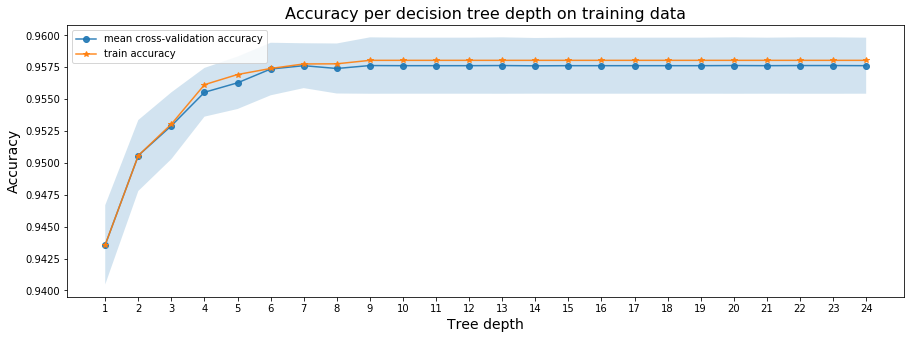

In [346]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')



In [347]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-9 tree achieves the best mean cross-validation accuracy 95.76332 +/- 0.11056% on training dataset


In [348]:
# function for training and evaluating a tree
final_dt = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
accuracy_train = final_dt.score(X_train, y_train)
accuracy_test = final_dt.score(X_test, y_test)
print('Single tree depth: ', 7)
print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')

Single tree depth:  7
Accuracy, Training Set:  95.7759 %
Accuracy, Test Set:  95.85463 %


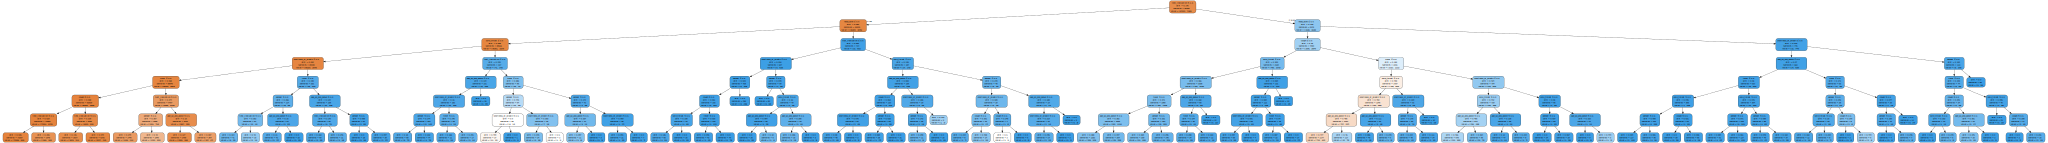

In [349]:
from sklearn.tree import export_graphviz
import graphviz

treedot1 = export_graphviz(final_dt,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot1)

Classification Accuracy (Test)	: 0.9585463082980753


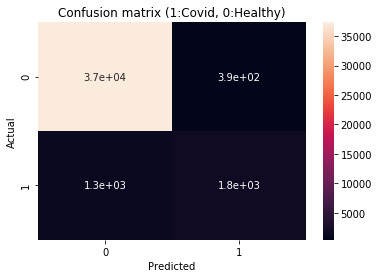

In [378]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_predict = final_dt.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy (Test)\t:", final_dt.score(X_test, y_test))

# Plot the two-way Confusion Matrix

sns.heatmap(confusion_matrix(y_test, test_predict), 
           annot = True)

plt.title('Confusion matrix (1:Covid, 0:Healthy)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [379]:
X_train.loc[(X_train['fever'] == 1) & (X_train['cough'] ==1)  & (X_train['head_ache'] ==1)& (X_train['test_indication'] ==1)& (X_train['age_60_and_above'] ==1)]

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
258257,1,1,0,0,1,1,1,1
148127,1,1,1,0,1,1,0,1
235370,1,1,0,0,1,1,0,1
258502,1,1,0,0,1,1,1,1
263566,1,1,1,0,1,1,0,1
215495,1,1,1,0,1,1,0,1
254197,1,1,0,1,1,1,1,1
254245,1,1,0,0,1,1,0,1
261664,1,1,0,1,1,1,1,1
263496,1,1,0,0,1,1,1,1


In [380]:
#someone with cough, fever, headache, age >= 60
test_case = [1,1,0,0,1,1,0,0]
test_dataframe = pd.DataFrame([test_case])
test_dataframe.columns = ['cough', 'fever', 'sore_throat','shortness_of_breath','head_ache','age_60_and_above','gender','test_indication']


In [381]:
final_dt.predict(test_dataframe)

array([1])